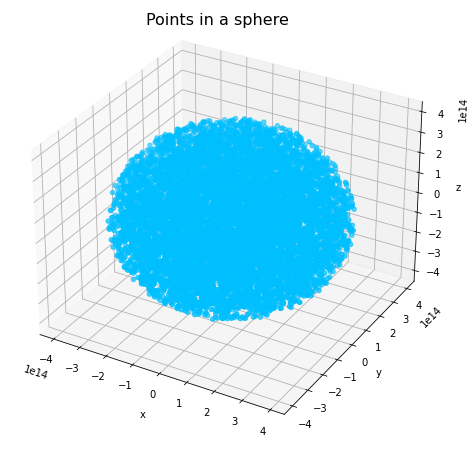

In [38]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################################################

N = 10000 #number of points
a = 40*10**13  #radius of the sphere
t_in = 0
m = 10**31
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)
### FUNCTIONS ##################################################################################################

def r(P, a) :
    return (P * a**3)**(1/3)

def theta(P) :
    return np.arccos(1 - 2*P)

def phi(P) :
    return 2 * np.pi * P

################################################################################################################


# random generated P
# three different ones in order not to be correlated
Pr = np.random.uniform(0, 1, N)
Ptheta = np.random.uniform(0, 1, N)
Pphi = np.random.uniform(0, 1, N)

# polar coordinates
r = r(Pr, a)
theta = theta(Ptheta)
phi = phi(Pphi)

'''
theta=np.arccos(np.random.uniform(-1,1,N))   # Polar
phi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
psi = np.pi*np.random.uniform(-1,1,N)        # Azimuthal
#iota = np.arccos(np.random.uniform(-1,1,mcn))  # Polar 
'''

# cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
fig.suptitle("Points in a sphere", fontsize='16', y=0.87)
ax.set_xlabel('\nx')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x, y, z, color = 'deepskyblue')
plt.show()

In [39]:
sphere = open("sphere.in", "w")

#sphere.write(str(N) + "\n"+ str(t_in) + "\n")

for i in range(N):
    sphere.write(str(m) + " "+ str(x[i])+ " " + str(y[i])+ " " + str(z[i])+ " " + str(v_x[i])+ " " + str(v_y[i])+ " " + str(v_z[i]))
    if (i != N):
        sphere.write("\n")
sphere.close()
#print(sphere.read())



# Let's do the conversion in internal units 

\begin{equation}
\frac{G_{physical} M_{physical}}{R_{physical} v^2_{physical}} = \frac{G_{internal} M_{internal}}{R_{internal} v^2_{internal}}
\end{equation}

but 
\begin{equation}
G_{internal} = 1
\end{equation}

so

\begin{equation}
G_{physical} = \frac{ \frac{R_{internal} }{ R_{physical}} \frac{ v^2_{physical} }{ v^2_{internal} }} { \frac{M_{physical} } {M_{internal}}}
\end{equation}



In [40]:
G_cgs = 6.67259 * 10**-8 #G in cgs
M_sun = 1.9891 * 10**33 #solar mass in g
R_sun = 6.9598 * 10**10 #solar radius in cm 
M_earth = 5.976 * 10**27 #earth mass in g
R_earth = 6.378 * 10**8 #earth radius in cm
ly = 9.463 * 10**17 #light year in cm
parsec = 3.086 * 10**18 #parsec in cm
AU = 1.496 * 10**13 #astronomical unit in cm

a_IU = a / parsec
m_IU = m / M_sun


def v_IU(M_cgs, r_cgs, v_cgs):
    return np.sqrt(r_cgs/(G_cgs*M_cgs))*v_cgs

def t_IU(M_cgs, r_cgs, t_cgs):
    return t_cgs/(np.sqrt(r_cgs/(G_cgs*M_cgs))*r_cgs)

print("We choose 1 solar mass as mass unit and 1 parsec unit as distance unit.")
print("200 km/s expressed in internal units is: %f" % (v_IU(M_sun,parsec,26.22*10**5)))
print("1 Myr expressed in internal units is: %f" % (t_IU(M_sun,parsec,3.156*10**13)))
print("1 time unit expressed in cgs is: %f Myrs" % (t_IU(M_sun,parsec,3.156*10**13)))


We choose 1 solar mass as mass unit and 1 parsec unit as distance unit.
200 km/s expressed in internal units is: 399.811350
1 Myr expressed in internal units is: 0.067069
1 time unit expressed in cgs is: 0.067069 Myrs


# period, dynamical time, collapse time

In [41]:
rho_IU = N* m_IU / (4/3 * np.pi * (a_IU)**3 ) # mass / volume SHOULD THIS BE DONE IN INTERNAL UNITS???
rho = N * m / (4/3 * np.pi * (a)**3 )

#v_IU = np.sqrt(a/(G*m))*v
#t_IU = t_cgs/(np.sqrt(r_cgs/(G_cgs*M_cgs))*r_cgs)

#period_1orbit= 2*np.pi*a / 

dyn_time = np.sqrt(3* np.pi /(16 * G_cgs * rho))
collapse_time = dyn_time / np.sqrt(2)

#internal units

dyn_time_IU = np.sqrt(3* np.pi /(16 * rho_IU))
collapse_time_IU = dyn_time_IU / np.sqrt(2)


print(dyn_time, collapse_time, )

print("Free fall time is %f in internal units, %f Myr" %(collapse_time_IU, collapse_time_IU*0.067069))
print("Run:  ./nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t %f < initial_conditions.in > output.out  to cover at least 1 free fall time." %collapse_time)



153837652.4161481 108779647.22527738
Free fall time is 0.000000 in internal units, 0.000000 Myr
Run:  ./nbody_sh1 -d 0.03 -e 1.0 -o 0.01 -t 108779647.225277 < initial_conditions.in > output.out  to cover at least 1 free fall time.


# density

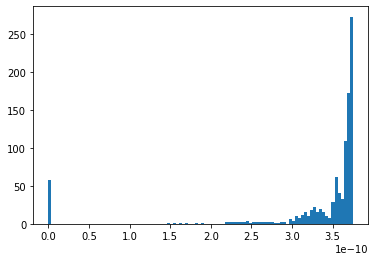

In [50]:
#density = N * m / (4/3 * np.pi * a**3)

#avrebbe senso vedere profilo di densità a t = 0 e poi...

radii = np.linspace(0.1, a, 1000)
#print(radii)
density= []
for R in radii:
    i = 0
    for r_p in r:    
        if (r_p <= R):
            i = i+1
        
    density.append(i * m / (4/3 * np.pi * R**3)) 
    
#print(density)

#plt.plot(radii, density)
#density = N[r] * m / (4/3 * np.pi * r**3)

plt.hist(density,100)
plt.show()




 # visualization

#plot orbita ellitica 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

dati=np.genfromtxt('output_converted.txt', delimiter=' ', usecols=range(1,3), invalid_raise=False)

dati_1=dati[::2]
dati_2=dati[1::2]

i=0
while i<len(dati_1):
    plt.scatter(dati_1[i,0], dati_1[i,1], color="blue")
    plt.scatter(dati_2[i,0], dati_2[i,1], color="red")
    i=i+1


dati=np.genfromtxt('output.out', delimiter=' ', usecols=range(1,3), invalid_raise=False)

dati_1=dati[::2]
dati_2=dati[1::2]

print(dati.shape)

In [61]:
f = open("output.out", "r")
lines = f.readlines()
print(len(lines))

elements= []
for line in lines:
    elements = np.append(elements, [line.split()])
print (len(elements))

n_bodies = int(lines[0])
n_timelapses = int(len(lines) / (2+n_bodies))
print(n_timelapses)


10200
70200
100


In [78]:
#timelapse = [["n_bodies","time", "1", "x", "y", "z", "vx", "vy", "vz"]]
timelapse = []
#print(timelapse)
   
event = 0

for i in range(n_timelapses):
    array = elements[event :(event + 2 + (n_bodies*1) +(n_bodies*6))]
    #print(array)
    timelapse.append(array)
    event = event + 2 + (n_bodies*1) + n_bodies*6


timelapse = np.array(timelapse, dtype = 'float')

print (timelapse.shape) #non sono troppo convinta sia giusto.. per ogni timelapse dovrei avere: n bodies, time e poi 7 valori * particelle.... AH FORSE È GIUSTO

#print(timelapse[1])
#print(lines)

(100, 702)


In [89]:
time = timelapse[1][1]

#matrice con n_bodies righe e la posizione x del relativo bodie sulla colonna
x = []
y = []
z = []
v_x = []
v_y = []
v_z = []

print(timelapse[2][3])
for n in range(n_bodies):
    for i in range(n_timelapses-1):
        time = np.append(time, timelapse[i+2][1])
        print(i)

        x[n] = np.append(x[n], timelapse[i+2][7*n + 3])
        y[n] = np.append(y[n], timelapse[i+2][7*n +4])
        z[n] = np.append(z[n],timelapse[i+2][7*n +5])
        vx_[n] = np.append(vx_[n],timelapse[i+2][7*n + 6])
        vy_[n] = np.append(vy_[n],timelapse[i+2][7*n + 7])
        vz_[n] = np.append(vz_[n],timelapse[i+2][7*n + 8])    

0.862122571715891
0


IndexError: list index out of range

    
x1 = timelapse[1][3] 
y1 = timelapse[1][4]
z1 = timelapse[1][5]
vx_1 = timelapse[1][6]
vy_1 = timelapse[1][7]
vz_1 = timelapse[1][8]

x2 = timelapse[1][10]
y2 = timelapse[1][11]
z2 = timelapse[1][12]
vx_2 = timelapse[1][13]
vy_2 = timelapse[1][14]
vz_2 = timelapse[1][15]

'''
x3 = timelapse[1][16]
y3 = timelapse[1][17]
z3 = timelapse[1][18]
vx_3 = timelapse[1][19]
vy_3 = timelapse[1][20]
vz_3 = timelapse[1][21]
'''

for i in range(n_timelapses-1):
    time = np.append(time, timelapse[i+2][1])
    
    x1 = np.append(x1, timelapse[i+2][3])
    y1 = np.append(y1, timelapse[i+2][4])
    z1 = np.append(z1,timelapse[i+2][5])
    vx_1 = np.append(vx_1,timelapse[i+2][6])
    vy_1 = np.append(vy_1,timelapse[i+2][7])
    vz_1 = np.append(vz_1,timelapse[i+2][8])
                       
    x2 = np.append(x2,timelapse[i+2][10])
    y2 = np.append(y2, timelapse[i+2][11])
    z2 = np.append(z2, timelapse[i+2][12])
    vx_2 = np.append(vx_2, timelapse[i+2][13])
    vy_2 = np.append(vy_2, timelapse[i+2][14])
    vz_2 = np.append(vz_2, timelapse[i+2][15])

In [60]:

#opens the output file and writes star's positions array for each time t in a list
class Star:
    def __init__(self, m, x, v): #x is the cartesian coordinate vector, v the cartesian velocity
        self.m = m
        self.position = np.array(x)
        self.velocity = np.array(v)
        self.kinetic_energy = (0.5)*self.m*(v[0]**2+v[1]**2+v[2]**2)
        
        
output = open("output.out", "r").readlines()
t=[]
timelapses = [] #list of star_collections, one for each time
for i in range(int(len(output)/(N+2))):
    t.append(float(output[i*(N+2)+1])) #time in internal units
    single_collection = []
    for j in range(N): 
        single_collection.append(Star(m, [float(output[i*(N+2)+(2+j)].split()[1]),float(output[i*(N+2)+(2+j)].split()[2]),float(output[i*(N+2)+(2+j)].split()[3])], [float(output[i*(N+2)+(2+j)].split()[4]),float(output[i*(N+2)+(2+j)].split()[5]),float(output[i*(N+2)+(2+j)].split()[6])]))
    timelapsess.append(single_collection)

#############################
print(t)
print(evolution_star_collections)

IndexError: list index out of range

In [52]:
output = open('output.out').readlines()
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []
x3 = []
y3 = []
z3 = []
x4 = []
y4 = []
z4 = []
x5 = []
y5 = []
z5 = []
t = []
for i in range(N):
    x1.append(float(output[i+2].split()[1]))
    y1.append(float(output[i+2].split()[2]))
    z1.append(float(output[i+2].split()[3]))
    x2.append(float(output[i+4042].split()[1]))
    y2.append(float(output[i+4042].split()[2]))
    z2.append(float(output[i+4042].split()[3]))
    x3.append(float(output[i+9900].split()[1]))
    y3.append(float(output[i+9900].split()[2]))
    z3.append(float(output[i+9900].split()[3]))
    x4.append(float(output[i+11920].split()[1]))
    y4.append(float(output[i+11920].split()[2]))
    z4.append(float(output[i+11920].split()[3]))
    x5.append(float(output[i+15960].split()[1]))
    y5.append(float(output[i+15960].split()[2]))
    z5.append(float(output[i+15960].split()[3]))
t.append(float(output[1]))
t.append(float(output[4041]))
t.append(float(output[9899]))
t.append(float(output[11919]))
t.append(float(output[15959]))

IndexError: list index out of range

In [15]:
#print("ATTENTION: BE SURE NBODY_SH1 HAS RUN AFTER EACH CLASS ISTANCE")
#opens the output file and writes star's positions array for each time t in a list
class Star:
    def __init__(self, m, x, v): #x is the cartesian coordinate vector, v the cartesian velocity
        self.m = m
        self.position = np.array(x)
        self.velocity = np.array(v)
        self.kinetic_energy = (0.5)*self.m*(v[0]**2+v[1]**2+v[2]**2)
        
        
output = open("output.out", "r").readlines()
t=[]
timelapses = [] #list of star_collections, one for each time
for i in range(int(len(output)/(N+2))):
    t.append(float(output[i*(N+2)+1])) #time in internal units
    single_collection = []
    for j in range(N): 
        single_collection.append(Star(m, [float(output[i*(N+2)+(2+j)].split()[1]),float(output[i*(N+2)+(2+j)].split()[2]),float(output[i*(N+2)+(2+j)].split()[3])], [float(output[i*(N+2)+(2+j)].split()[4]),float(output[i*(N+2)+(2+j)].split()[5]),float(output[i*(N+2)+(2+j)].split()[6])]))
    timelapsess.append(single_collection)

#############################
print(t)
print(evolution_star_collections)
##############################

#converts list in array, usefull for animation
#initial frame
position_of_nth_star = []
for star in star_collection:
        position_of_nth_star.append([star.position[0],star.position[1],star.position[2]])  
#evolved frames. First frame is the initial one
positions_at_given_frame = [position_of_nth_star]
for frame in evolution_star_collections:
    position_of_nth_star = []
    for star in frame:
        position_of_nth_star.append([star.position[0],star.position[1],star.position[2]])
    positions_at_given_frame.append(np.array(position_of_nth_star))
P = np.array(positions_at_given_frame)

#create figure and set axes
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-a, a)
ax.set_ylim3d(-a, a)
ax.set_zlim3d(-a, a)
ax.set_xlabel('X [parsec]')
ax.set_ylabel('Y [parsec]')
ax.set_zlabel('Z [parsec]')
# Provide starting angle for the view.
#ax.view_init(25, 10)

#PROBLEM HERE
#plt.title('t = %d Myr' % 0.) 
#plt.title("start") #doesn't show!
scatters = [ ax.scatter(P[0][i,0:1], P[0][i,1:2], P[0][i,2:], color=self.colors[i]) for i in range(self.N) ]

speed_up = int(speed)
def animate_scatters(frame): 
    for i in range(N): 
        scatters[i]._offsets3d = (P[frame*speed_up][i,0:1], P[frame*speed_up][i,1:2], P[frame*speed_up][i,2:])
    plt.title('t = %f Myr, %f free_fall_time' %(t[frame*speed_up]*0.067069, t[frame*speed_up]/collapse_time)) 
    return scatters

ani=animation.FuncAnimation(fig, animate_scatters, frames=int(len(P)/speed_up)-1, interval=100) 

#writervideo = animation.FFMpegWriter(fps=60) 
#ani.save('homologous_collapse.mp4', writer=writervideo) 
from IPython.display import HTML 
display(HTML(ani.to_jshtml()))
plt.close()

ATTENTION: BE SURE NBODY_SH1 HAS RUN AFTER EACH CLASS ISTANCE


NameError: name 'Star' is not defined

In [16]:
sphere_converted = open("sphere_converted.in", "r")
mass_c, x_c, y_c, z_c, vx_c, vy_c, vz_c = np.loadtxt("sphere_converted.in", delimiter=" ", comments="#", dtype="float").T
print(len(mass_c))

#print(sphere_converted.read())


1000


In [15]:
#we can choose the units we want to use....
# I can either fix: G (=1 always), M and r, OR : G(=1 always), M, v

G = 6.674e-11 #N⋅m2/kg2 or 6.674 * 10**(-8) in cgs
starting_time = 0       #starting time added to the input_converted file
center_of_mass = 0      #set this to True if you want the coordinates to be in the center of mass

#mass is always set (we can change it in the future but I think it's the simplest way)
#now we are left with radius and velocity

set_radius = True       #if this is True the radius will be set to 1 ua (which can be changed in the code). Then the velocity will be calculated accordingly (to get G=1)
#if this is False the velocity will be set to the velocity of earth and the radius will be calculated accordingly




mass = []
x = []
y = []
z = []
vx =[]
vy = []
vz = []
r = []

mass, x, y, z, vx, vy, vz = np.loadtxt("sphere.in", delimiter=" ", comments="#", dtype="float").T
number_of_bodies = len(mass)

mass_x = [a * b for a, b in zip(mass, x)]      #mass times coordinate x
mass_y = [a * b for a, b in zip(mass, y)]      #mass times coordinate y
mass_z = [a * b for a, b in zip(mass, z)]      #mass times coordinate z
mass_vx = [a * b for a, b in zip(mass, vx)]      #mass times coordinate vx
mass_vy = [a * b for a, b in zip(mass, vy)]      #mass times coordinate vy
mass_vz = [a * b for a, b in zip(mass, vz)]      #mass times coordinate vz

cm_x = np.sum(mass_x)/sum(mass)
cm_y = np.sum(mass_y)/sum(mass)
cm_z = np.sum(mass_z)/sum(mass)
cm_vx = np.sum(mass_vx)/sum(mass)
cm_vy = np.sum(mass_vy)/sum(mass)
cm_vz = np.sum(mass_vz)/sum(mass)

print(len(mass))

#mass_internal = mass[0]     #use the first mass as unit, you can choose another one
mass_internal = 1.98892 *10**33 # g 1 solar mass as internal unit

if set_radius == True:
    r_internal = 14959787070000   #circa 10**13 cm, 1 ua, you can change this to be anything (but 0)
    v_internal = np.sqrt(G*mass_internal/r_internal)

else:
    v_internal =  2978480   #cm/s more or less the velocity of the earth around the sun... we can change it
    r_internal = G*mass_internal/v_internal**2

t_internal = r_internal/v_internal


new_mass = mass/mass_internal

if center_of_mass == True:
    new_x = (x-cm_x)/r_internal
    new_y = (y-cm_y)/r_internal
    new_z = (z-cm_z)/r_internal
    new_vx = (x-cm_vx)/v_internal
    new_vy = (x-cm_vy)/v_internal
    new_vz = (x-cm_vz)/v_internal
else:
    new_x = x/r_internal
    new_y = y/r_internal
    new_z = z/r_internal
    new_vx = vx/v_internal
    new_vy = vy/v_internal
    new_vz = vz/v_internal



with open("sphere_converted.in", "w") as f:     #file ready to be given to the C code
    print(number_of_bodies, starting_time, sep="\n", file=f)
    np.savetxt(f, np.column_stack([new_mass, new_x, new_y, new_z, new_vx, new_vy, new_vz]), delimiter=" ")

    


1000
